# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income
monthly_income = 12000
# YOUR CODE HERE!

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
btc_request = requests.get(btc_url).json()
eth_request = requests.get(eth_url).json()
btc_request
eth_request

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 112988431,
   'total_supply': 112988431,
   'max_supply': 0,
   'quotes': {'USD': {'price': 384.75,
     'volume_24h': 12085576639,
     'market_cap': 43429370195,
     'percentage_change_1h': -0.014225670558673,
     'percentage_change_24h': 4.72953793257109,
     'percentage_change_7d': 8.80782149055445,
     'percent_change_1h': -0.014225670558673,
     'percent_change_24h': 4.72953793257109,
     'percent_change_7d': 8.80782149055445}},
   'last_updated': 1602591808}},
 'metadata': {'timestamp': 1602591808,
  'num_cryptocurrencies': 1436,
  'error': None}}

In [14]:
# Fetch current BTC price
my_btc = btc_request["data"]["1"]["quotes"]["USD"]["price"]

# YOUR CODE HERE!

# Fetch current ETH price
# YOUR CODE HERE!]
my_eth = eth_request["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value= 1.2 * my_btc
my_eth_value= 5.3 * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
Crypto_Value = my_btc_value + my_eth_value

The current value of your 11505.0 BTC is $13806.00
The current value of your 384.75 ETH is $2039.17


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
API_key = os.getenv("API_key")
Api_Secret_Key = os.getenv("API_Secret_Key")
# YOUR CODE HERE!

# Create the Alpaca API object
Alpaca = tradeapi.REST(API_key, Api_Secret_Key, api_version="v2")
# YOUR CODE HERE!

In [13]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = Alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Pick AGG and SPY close prices
AGG_price = float(df_portfolio["AGG"]["close"])
SPY_price = float(df_portfolio["SPY"]["close"])
# YOUR CODE HERE!

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_price}")
print(f"Current SPY closing price: ${SPY_price}")

Current AGG closing price: $119.445
Current SPY closing price: $334.55


In [19]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy = 50
my_agg = 200
My_AGG= my_agg * AGG_price
My_SPY= my_spy * SPY_price
My_stocks = My_AGG + My_SPY
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${My_SPY:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${My_AGG:0.2f}")

The current value of your 50 SPY shares is $16727.50
The current value of your 200 AGG shares is $23889.00


### Savings Health Analysis

In [23]:
# Create savings DataFrame
# YOUR CODE HERE!
savings = [Crypto_Value,My_stocks]
df_savings = pd.DataFrame(savings,columns=["Amount"], index=["Crypto", "Shares"])
# Display savings DataFrame
display(df_savings)

Amount
Crypto  15845.175
Shares  40616.500

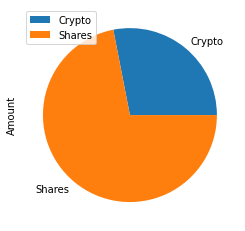

In [26]:
# Plot savings pie chart
df_savings.plot(kind="pie", y="Amount")
# YOUR CODE HERE!

In [33]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
Total_Savings=sum(savings)
# YOUR CODE HERE!

# Validate saving health
if Total_Savings > emergency_fund:
    print("Congratutions for having enough money left in the fund!")
elif Total_Savings == emergency_fund:
    print("Congratulations on reaching the goal!")
else:
    print(f"Sorry, you still need ${emergency_fund-Total_Savings}")
# YOUR CODE HERE!

Congratutions for having enough money left in the fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [34]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [44]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = Alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_stock_data.index = df_stock_data.index.date
df_stock_data.head()

AGG                                         SPY          \
              open      high      low   close   volume    open    high   
2015-08-07  109.14  109.2750  109.035  109.21  2041167  208.16  208.34   
2015-08-10  109.15  109.1700  108.920  109.06  1149778  209.28  210.67   
2015-08-11  109.42  109.5765  109.284  109.42  1420907  208.98  209.47   
2015-08-12  109.55  109.7100  109.350  109.36  1468979  207.11  209.14   
2015-08-13  109.36  109.3651  109.110  109.15  1465173  208.73  209.55   

                                       
               low   close     volume  
2015-08-07  206.87  207.93   87669782  
2015-08-10  209.28  210.58   66755890  
2015-08-11  207.76  208.63   88424557  
2015-08-12  205.36  208.89  136171450  
2015-08-13  208.01  208.63   77197796

In [52]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [2/5,3/5],
    num_simulation = 500,
    num_trading_days = 252*30)
# YOUR CODE HERE!

In [53]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()
# YOUR CODE HERE!

AGG                                                      SPY  \
              open      high      low   close   volume daily_return    open   
2015-08-07  109.14  109.2750  109.035  109.21  2041167          NaN  208.16   
2015-08-10  109.15  109.1700  108.920  109.06  1149778    -0.001374  209.28   
2015-08-11  109.42  109.5765  109.284  109.42  1420907     0.003301  208.98   
2015-08-12  109.55  109.7100  109.350  109.36  1468979    -0.000548  207.11   
2015-08-13  109.36  109.3651  109.110  109.15  1465173    -0.001920  208.73   

                                                            
              high     low   close     volume daily_return  
2015-08-07  208.34  206.87  207.93   87669782          NaN  
2015-08-10  210.67  209.28  210.58   66755890     0.012745  
2015-08-11  209.47  207.76  208.63   88424557    -0.009260  
2015-08-12  209.14  205.36  208.89  136171450     0.001246  
2015-08-13  209.55  208.01  208.63   77197796    -0.001245

In [55]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return() 
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2          3         4          5          6    \
0     1.000000  1.000000  1.000000   1.000000  1.000000   1.000000   1.000000   
1     0.998868  1.000018  1.007336   1.002431  1.004285   1.006426   0.989550   
2     0.996654  1.000910  1.015315   1.000627  0.996817   1.013496   0.991330   
3     1.019960  0.995510  1.012598   0.994995  1.005087   1.007922   0.991696   
4     1.022207  0.998716  1.011146   0.985664  1.004453   1.010579   0.995802   
...        ...       ...       ...        ...       ...        ...        ...   
7556  8.274857  8.218545  9.635286  10.480834  5.464631  13.612294  16.881393   
7557  8.243386  8.184070  9.560660  10.403031  5.474510  13.621184  17.010593   
7558  8.278857  8.154976  9.572933  10.433853  5.420464  13.772597  17.169886   
7559  8.317700  8.211527  9.386578  10.311402  5.398944  13.731276  17.145358   
7560  8.347867  8.143765  9.450150  10.248918  5.352564  13.767055  17.453126   

           7          8         9    ...       490       491        492  \
0     1.000000   1.000000  1.000000  ...  1.000000  1.000000   1.000000   
1     0.999326   0.996856  0.998023  ...  0.994704  0.987665   0.995532   
2     1.010195   0.991362  1.002763  ...  0.992627  0.996457   0.995655   
3     1.004718   0.989973  1.005898  ...  0.991860  0.998552   0.999966   
4     1.006438   0.993533  1.013312  ...  0.985876  1.003617   1.008429   
...        ...        ...       ...  ...       ...       ...        ...   
7556  6.044537  14.302385  5.438660  ...  7.847657  1.977887  12.511545   
7557  6.064222  14.348721  5.494197  ...  7.812401  1.958690  12.591142   
7558  6.111891  14.249139  5.552103  ...  7.781378  1.954987  12.509041   
7559  6.111309  14.272501  5.477861  ...  7.751710  1.963349  12.423990   
7560  6.119840  14.202024  5.437466  ...  7.676967  1.969270  12.408659   

           493       494        495       496       497       498        499  
0     1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   1.000000  
1     1.010254  0.997678   0.997912  0.995527  1.009228  1.006755   1.004732  
2     1.018419  0.999564   1.014938  0.990606  1.010427  1.006778   1.005452  
3     1.020406  1.003417   0.996558  0.998703  1.007350  1.003769   1.005726  
4     1.018109  1.009446   1.013203  1.002634  1.010023  0.995025   0.982168  
...        ...       ...        ...       ...       ...       ...        ...  
7556  7.882418  5.449565  14.470942  4.957517  6.635638  7.717316  35.663027  
7557  7.973215  5.440214  14.681981  4.944215  6.598357  7.763810  35.766387  
7558  7.987242  5.436765  14.840164  4.904311  6.590842  7.791224  36.003017  
7559  7.990294  5.483862  14.840391  4.910830  6.546127  7.790698  36.301836  
7560  8.066746  5.505605  14.949319  4.964078  6.583372  7.803686  36.195930  

[7561 rows x 500 columns]

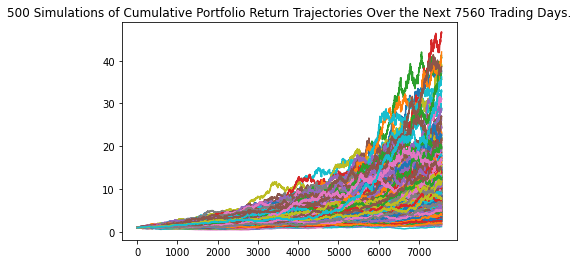

In [56]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()
# YOUR CODE HERE!

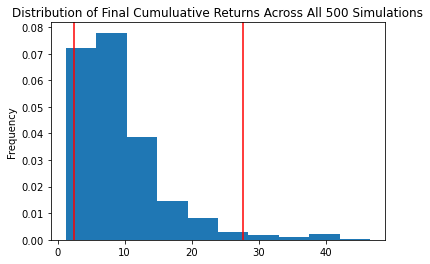

In [57]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()
# YOUR CODE HERE!

### Retirement Analysis

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.434645
std               6.673917
min               1.215431
25%               5.038099
50%               7.580726
75%              12.041953
max              46.647332
95% CI Lower      2.395922
95% CI Upper     27.726162
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [59]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47918.44 and $554523.23


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [63]:
# Set initial investment
Initial_investment = 20000 * 1.5


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $71877.65 and $831784.85


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [2/5,3/5],
    num_simulation = 500,
    num_trading_days = 252*5)
# YOUR CODE HERE!

In [65]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_dist.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.996921  0.996232  0.992818  0.994757  1.001963  0.997980  1.006231   
2     1.002433  0.989763  1.000430  0.990618  1.007375  1.004694  1.009160   
3     1.014199  0.983869  0.993633  0.995136  1.013792  1.006365  1.012886   
4     1.015045  0.981407  0.992232  0.998808  1.003484  1.007609  1.012640   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.722547  1.766542  1.190560  0.940175  1.156206  1.753402  1.031684   
1257  1.716571  1.778062  1.193270  0.931369  1.155582  1.743622  1.033348   
1258  1.746186  1.776223  1.191762  0.926587  1.159677  1.748897  1.029372   
1259  1.753206  1.765206  1.185607  0.927602  1.166666  1.736790  1.034535   
1260  1.767806  1.750904  1.177093  0.933698  1.175508  1.724614  1.022735   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.009293  1.005237  0.996552  ...  0.998078  0.995570  1.008290   
2     0.996222  1.010330  1.010324  ...  0.985800  0.999741  1.009172   
3     1.009189  1.018948  1.006306  ...  0.989028  1.006086  1.018010   
4     1.023846  1.010113  1.012569  ...  0.993044  1.002170  1.020548   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.173174  0.902806  1.495710  ...  1.203515  2.330101  1.182614   
1257  1.158181  0.896579  1.514861  ...  1.193107  2.321303  1.181025   
1258  1.170527  0.888940  1.523596  ...  1.211738  2.338526  1.185209   
1259  1.155251  0.885318  1.515627  ...  1.211555  2.340781  1.184486   
1260  1.147537  0.880199  1.525304  ...  1.217165  2.329244  1.183672   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.006610  0.990933  0.995414  1.009121  1.013179  0.995349  1.006775  
2     1.004717  0.980191  0.994169  1.006881  0.998732  0.992302  1.013431  
3     1.011869  0.970994  0.979447  1.017233  1.009220  0.991936  1.022419  
4     1.016044  0.984032  0.997713  1.022286  1.006526  0.997889  1.033529  
...        ...       ...       ...       ...       ...       ...       ...  
1256  2.021640  0.913000  0.990239  2.088846  1.155006  2.208807  1.475612  
1257  2.018958  0.904385  0.984719  2.074021  1.152231  2.189301  1.451045  
1258  2.015381  0.903865  0.975817  2.077551  1.154471  2.211788  1.446095  
1259  2.016599  0.900685  0.984850  2.089464  1.146094  2.200756  1.457165  
1260  2.026649  0.900190  0.981436  2.077795  1.143552  2.186969  1.454276  

[1261 rows x 500 columns]

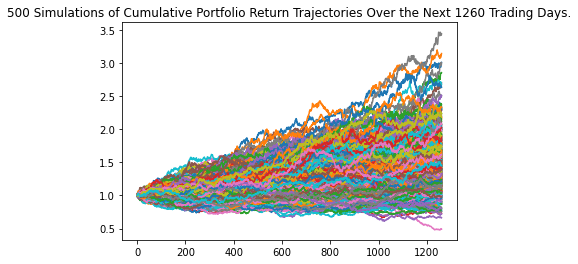

In [66]:
# Plot simulation outcomes
Line_plot = MC_dist.plot_simulation() 
# YOUR CODE HERE!

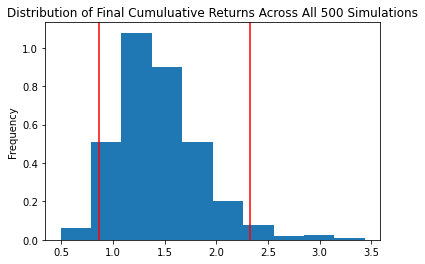

In [67]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
Dist_plot = MC_dist.plot_distribution() 

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five = MC_dist.summarize_cumulative_return()
# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.450980
std               0.400282
min               0.492229
25%               1.175205
50%               1.391331
75%               1.668607
max               3.439251
95% CI Lower      0.868187
95% CI Upper      2.327204
Name: 1260, dtype: float64


In [76]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*20000,2)
ci_upper_five = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $47918.44 and $554523.23


### Ten Years Retirement Option

In [69]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_Dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [2/5,3/5],
    num_simulation = 500,
    num_trading_days = 252*10)

In [70]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_Dist.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004756  0.990549  1.003053  0.998076  1.007274  0.990216  1.013977   
2     1.008538  1.003044  0.989944  1.017457  1.018266  0.990429  1.008981   
3     1.008836  1.014601  0.992142  1.010470  1.015994  1.000216  1.027859   
4     1.005219  1.011218  0.991484  1.010451  1.020815  0.995176  1.036504   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.623568  1.203907  2.237973  1.927717  2.073065  1.966810  2.095477   
2517  2.594878  1.191854  2.224811  1.911359  2.086933  1.980877  2.061647   
2518  2.599666  1.186138  2.222909  1.883177  2.097794  1.994211  2.050204   
2519  2.589369  1.171117  2.226745  1.865433  2.082905  2.015381  2.041334   
2520  2.590919  1.175463  2.198757  1.851671  2.058263  2.012878  2.050366   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.006707  1.007793  1.000938  ...  1.000144  1.007777  1.004505   
2     0.995571  1.002011  1.007585  ...  1.003955  0.994873  1.015362   
3     0.986379  0.996458  1.001658  ...  1.001480  0.998181  1.019943   
4     0.995545  0.986053  1.011914  ...  0.990235  1.022014  1.015304   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.212862  1.623780  1.444484  ...  1.551894  1.347134  1.104414   
2517  2.234147  1.615433  1.469915  ...  1.539863  1.347385  1.112197   
2518  2.210012  1.583938  1.467213  ...  1.535069  1.349710  1.127216   
2519  2.203688  1.593238  1.486682  ...  1.542867  1.345488  1.136892   
2520  2.186532  1.579263  1.520616  ...  1.539624  1.349564  1.129050   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.012726  0.997535  1.004434  1.003050  0.999095  0.994739  1.011832  
2     1.021011  0.996261  1.004769  0.992833  0.992807  1.000818  1.009670  
3     1.010076  0.994344  1.016443  0.999816  0.983751  1.004014  0.993149  
4     0.987261  0.989124  1.017109  0.991934  0.989257  1.006196  0.977722  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.216201  2.274864  2.694177  5.100440  1.878901  2.118995  2.935787  
2517  1.237628  2.263035  2.725546  5.085514  1.867344  2.141654  2.935964  
2518  1.239901  2.246399  2.739239  5.156770  1.851324  2.114955  2.941690  
2519  1.244236  2.244678  2.754074  5.164613  1.854159  2.096215  2.962315  
2520  1.232558  2.214211  2.748563  5.163629  1.865232  2.106038  2.963216  

[2521 rows x 500 columns]

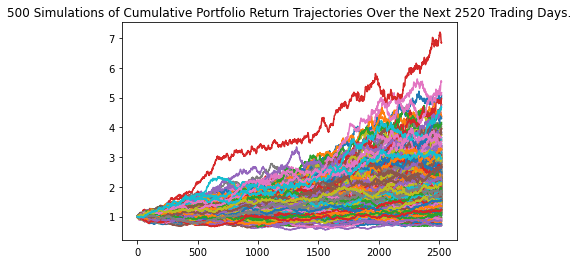

In [71]:
# Plot simulation outcomes
# YOUR CODE HERE!
Line_Plot = MC_Dist.plot_simulation() 


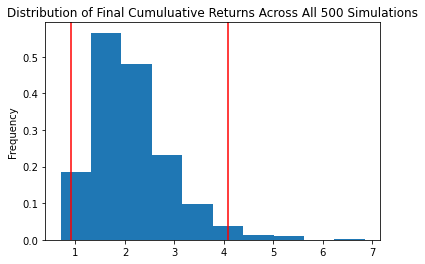

In [72]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
Dist_Plot = MC_Dist.plot_distribution() 

In [73]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_Dist.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.130144
std               0.814834
min               0.697587
25%               1.565195
50%               1.997979
75%               2.496302
max               6.848111
95% CI Lower      0.911752
95% CI Upper      4.072840
Name: 2520, dtype: float64


In [75]:
# Set initial investment
# YOUR CODE HERE!
Initial_Investment = 20000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8]*20000,2)
ci_upper_ten = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${Initial_Investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $47918.44 and $554523.23
